## Model Training and Model Evaluation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("cleaned_dataset.csv")
df

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,pulse_pressure,health_index,cardio
0,2,62.0,110,80,1,1,0,0,1,50,21.967120,30,0,0
1,1,85.0,140,90,3,1,0,0,1,55,34.927679,50,1,1
2,1,64.0,130,70,3,1,0,0,0,51,23.507805,60,2,1
3,2,82.0,150,100,1,1,0,0,1,48,28.710479,50,0,1
4,1,56.0,100,60,1,1,0,0,0,47,23.011177,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,2,76.0,120,80,1,1,1,0,1,52,26.927438,40,1,0
69972,1,126.0,140,90,2,2,0,0,1,61,50.472681,50,2,1
69973,2,105.0,180,90,3,1,0,1,0,52,31.353579,90,3,1
69974,1,72.0,135,80,1,2,0,0,0,61,27.099251,55,2,1


In [6]:
target = 'cardio'
features = [col for col in df.columns if col != target]

In [8]:
X = df[features]
y = df[target]
X.shape, y.shape


((69976, 13), (69976,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=27,
    stratify=y
)


In [14]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=27
)


In [16]:
rf.fit(X_train, y_train,)

RandomForestClassifier(random_state=27)

In [18]:
y_pred = rf.predict(X_test)
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")


Accuracy : 0.70


In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2486, 1015],
       [1091, 2406]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3501
           1       0.70      0.69      0.70      3497

    accuracy                           0.70      6998
   macro avg       0.70      0.70      0.70      6998
weighted avg       0.70      0.70      0.70      6998



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

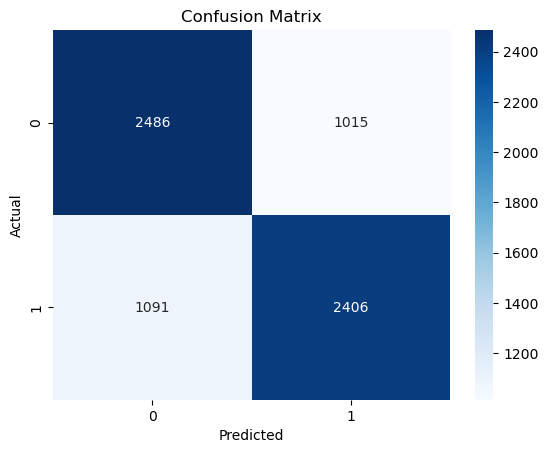

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Axes: >

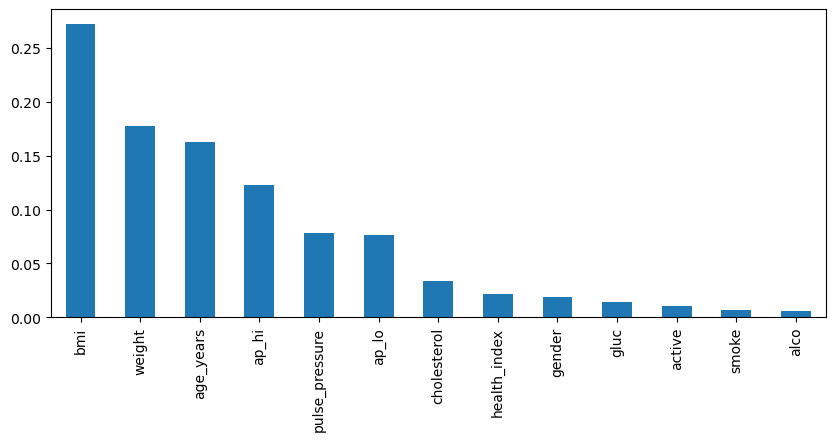

In [30]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance
feature_importance.plot(kind='bar', figsize=(10,4))



## Save the model on disk

In [33]:
import joblib

feature_order = list(X_train.columns)

joblib.dump(
    {
        'model': rf,
        'columns': feature_order
    },
    'cardio_model.pkl'
)


['cardio_model.pkl']